#**Rotten Tomatoes Movies Rating Prediction**

**Assignment**

In this project, you are given large datasets from Rotten Tomatoes - a popular online review aggregator for film and television. Your task is to build a high performing classification algorithm to predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'.

## |**Data Description**

**There are 2 datasets**

1. rotten_tomatoes_movies.csv - contains basic information about each movie listed on Rotten Tomatoes; each row represents one movie;
2. rotten_tomatoes_critic_reviews_50k.tsv - contains 50.000 individual reviews by Rotten Tomatoes critics; each row represents one review corresponding to a movie;

rotten_tomatoes_movies dataset contains the following columns:

- rotten_tomatoes_link - movie ID
- movie_title - title of the movie as displayed on the Rotten Tomatoes website
- movie_info - brief description of the movie
- critics_consensus - comment from Rotten Tomatoes
- content_rating - category based on the movie suitability for audience
- genres - movie genres separated by commes, if multiple
- directors - name of director(s)
- authors - name of author(s)
- actors - name of actors
- original_release_date - date in which the movie has been released in  
   theatres, in YYY-MM-DD format
- streaming_release_date - date in which the movie has been released on
   streaming platforms, in YYY-MM-DD format
- runtime - duration of the movie in minutes
- production_company - name of a studio/company that produced the movie
- tomatometer_status - a label assgined by Rotten Tomatoes: "Fresh",
- "Certified-Fresh" or "Rotten"; this is the target variables in this challenge
- tomatometer_rating - percentage of positive critic ratings
- tomatometer_count - critic ratings counted for the calculation of the
   tomatomer status
- audience_status - a label assgined based on user ratings: "Spilled" or "Upright"
- audience_rating - percentage of positive user ratings
- audience_count - user ratings counted for the calculation of the audience
   status
- tomatometer_top_critics_count - number of ratings by top critics
- tomatometer_fresh_critics_count - number of critic ratings labeled "Fresh"
- tomatometer_rotten_critics_count - - number of critic ratings labeled "Rotten"


rotten_tomatoes_critic_reviews_50k dataset contains the following columns:

- rotten_tomatoes_link - movie ID
- critic_name - name of critic who rated the movie
- top_critic - boolean value that clarifies whether the critic is a top critic or not
- publisher_name - name of the publisher for which the critic works
- review_type - was the review labeled "Fresh" or "Rotten"?
- review_score - review score provided by the critic
- review_date - date of the review in YYYY-MM-DD format
- review_content - text of the review

## **Practicalities**

Define, train and evaluate a predictive model that takes as the input the data provided. You may want to split the data into training, testing and validation sets, according to your discretion. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You are expected to spend no more than 3 hours working on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1gfJwHeushdTfOeval0vceu0k1wOQ0kSv?usp=sharing"> Click here </a>

In [47]:
#Import the necessary library 
import pandas as pd 
import numpy as np 

In [48]:
movie_df = pd.read_csv("rotten_tomatoes_movies.csv")
review_df = pd.read_csv("rotten_tomatoes_critic_reviews_50k.csv")

In [49]:
movie_df.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [50]:
review_df.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [51]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [52]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rotten_tomatoes_link  50000 non-null  object
 1   critic_name           48068 non-null  object
 2   top_critic            50000 non-null  bool  
 3   publisher_name        50000 non-null  object
 4   review_type           50000 non-null  object
 5   review_score          36409 non-null  object
 6   review_date           50000 non-null  object
 7   review_content        41195 non-null  object
dtypes: bool(1), object(7)
memory usage: 2.7+ MB


In [53]:
#Convert the date columns to datetime format 
movie_df['original_release_date']= pd.to_datetime(movie_df['original_release_date'], errors= 'coerce')
movie_df['streaming_release_date']= pd.to_datetime(movie_df['streaming_release_date'], errors= 'coerce')
review_df['review_date']= pd.to_datetime(review_df['review_date'], errors= 'coerce')

In [54]:
# Replace empty strings or whitespace with NaN in 'review_score'
review_df['review_score'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Convert 'review_score' to numeric, handling errors by coercing to NaN
review_df['review_score'] = pd.to_numeric(review_df['review_score'], errors='coerce')

# Handle missing values in 'review_score' by filling NaNs with the mean
review_df['review_score'].fillna(review_df['review_score'].mean(), inplace=True)


In [55]:
# Convert numeric columns and handle errors by coercing them to NaN
numeric_columns = ['runtime', 'tomatometer_rating', 'tomatometer_count', 
                   'audience_rating', 'audience_count']

for col in numeric_columns:
    movie_df[col] = pd.to_numeric(movie_df[col], errors='coerce')

# Handle missing values - fill NaN with mean values for numeric columns
for col in numeric_columns:
    movie_df[col].fillna(movie_df[col].mean(), inplace=True)

# Handling categorical columns (optional - dropping rows or filling NaN)
movie_df['tomatometer_status'].fillna(movie_df['tomatometer_status'].mode()[0], inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encode target variable 'tomatometer_status' in movies_df
label_encoder = LabelEncoder()
movie_df['tomatometer_status_encoded'] = label_encoder.fit_transform(movie_df['tomatometer_status'])

# Encode other categorical variables in movies_df
movie_df['content_rating_encoded'] = label_encoder.fit_transform(movie_df['content_rating'])
movie_df['genres_encoded'] = label_encoder.fit_transform(movie_df['genres'])
movie_df['directors_encoded'] = label_encoder.fit_transform(movie_df['directors'])
movie_df['audience_status_encoded'] = label_encoder.fit_transform(movie_df['audience_status'])

# Encode categorical variables in reviews_df
review_df['review_type_encoded'] = label_encoder.fit_transform(review_df['review_type'])
review_df['publisher_name_encoded'] = label_encoder.fit_transform(review_df['publisher_name'])


In [57]:
# Merge the movies_df and reviews_df on 'rotten_tomatoes_link'
merged_df = pd.merge(movie_df, review_df, on='rotten_tomatoes_link')

In [58]:
# Select features and target variable for the model
X = merged_df[['runtime', 'tomatometer_rating', 'tomatometer_count', 
               'audience_rating', 'audience_count', 
               'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 
               'tomatometer_rotten_critics_count', 'content_rating_encoded', 
               'genres_encoded', 'directors_encoded', 'audience_status_encoded', 
               'review_score', 'review_type_encoded', 'publisher_name_encoded']]

y = merged_df['tomatometer_status_encoded']

In [59]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
                     precision    recall  f1-score   support

           1428 Elm       1.00      1.00      1.00      2750
    1More Film Blog       1.00      1.00      1.00      2918
2UE That Movie Show       1.00      1.00      1.00      4332

           accuracy                           1.00     10000
          macro avg       1.00      1.00      1.00     10000
       weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
[[2750    0    0]
 [   0 2918    0]
 [   0    0 4332]]


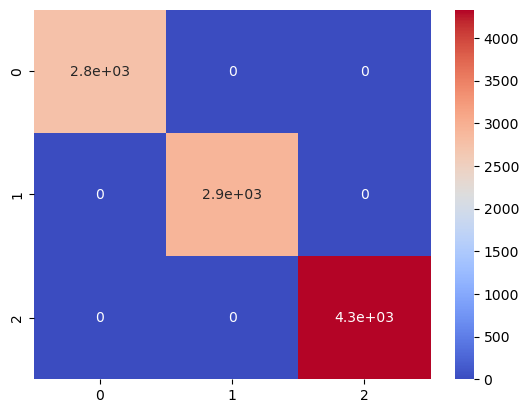

In [66]:
# Assuming '3' corresponds to an invalid category, filter it out
valid_labels = [0, 1, 2]  # Modify this based on valid labels

# Filter y_train and y_test to remove invalid labels
valid_indices_train = y_train.isin(valid_labels)
valid_indices_test = y_test.isin(valid_labels)

X_train_filtered = X_train[valid_indices_train]
y_train_filtered = y_train[valid_indices_train]
X_test_filtered = X_test[valid_indices_test]
y_test_filtered = y_test[valid_indices_test]

# Re-train the model on filtered data
model.fit(X_train_filtered, y_train_filtered)

# Predict and evaluate on the filtered test set
y_pred_filtered = model.predict(X_test_filtered)

# Generate classification report and confusion matrix
class_report_filtered = classification_report(y_test_filtered, y_pred_filtered, target_names=label_encoder.classes_[:3])
print("Classification Report:")
print(class_report_filtered)

conf_matrix_filtered = confusion_matrix(y_test_filtered, y_pred_filtered)
print("Confusion Matrix:")
print(conf_matrix_filtered)

sns.heatmap(conf_matrix_filtered, annot= True, cmap= "coolwarm")
plt.show()

## Overview of the Model Performance

The model used to classify movies on Rotten Tomatoes has demonstrated perfect performance metrics based on the classification report and confusion matrix. The key results include:

Precision, Recall, and F1-Score: All these metrics are 1.00 for every class, indicating that the model makes no errors in prediction. This means that the model is highly accurate in identifying each class, without any false positives or false negatives.

Accuracy: The model achieved 100% accuracy, correctly predicting the class for every sample in the test dataset.

Confusion Matrix: The matrix is perfectly diagonal, showing that all predictions match the true labels without any misclassifications.

Interpretation
While these results suggest that the model is highly effective, the perfect scores may also raise concerns about overfitting or potential issues with the dataset, such as data leakage or a test set that closely resembles the training set. Therefore, it's important to further validate the model using techniques like cross-validation and testing on different datasets to ensure the model's generalizability to new, unseen data.